In [1]:
import numpy as np
import pandas as pd

# Plots

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon

# plt setting
plt.style.use('seaborn-whitegrid')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Fixed-point iteration

Given a function $f$ defined on the real numbers with real values and given a point $x_{0}$ in the domain of $f$, the fixed point iteration is

$$x_{n+1}=f(x_{n}),\,n=0,1,2,\dots $$

which gives rise to the sequence $x_{0},x_{1},x_{2},\dots$  which is hoped to converge to a point $x$.

In [2]:
def fixed_point(f,x0,TOL,Nmax):
    # endpoint values a, b, 
    # tolerance TOL, 
    # maximum iterations NMAX
    xn=np.zeros(Nmax, dtype=float)
    En=np.zeros(Nmax, dtype=float)
    xn[0] = x0
    En[0] = 1
    for n in range(0,Nmax-1):
        xn[n+1] = f(xn[n])
        En[n+1]=xn[n+1]-xn[n]
        if abs(En[n+1]) < TOL:
            return xn, En, n
    return None

In [3]:
f = lambda x : np.sqrt(x)
x0 = .5
Nmax=20; TOL=1e-4;

xn, En, n = fixed_point(f,x0,TOL,Nmax)
# data_fixed_point = pd.DataFrame({'xn': xn, 'En': En})
data_fixed_point = pd.DataFrame({'xn': xn[0:n+2], 'En': En[0:n+2]})
data_fixed_point

,xn,En
0,0.500000,1.000000
1,0.707107,0.207107
2,0.840896,0.133790
3,0.917004,0.076108
4,0.957603,0.040599
5,0.978572,0.020969
6,0.989228,0.010656
7,0.994599,0.005371
8,0.997296,0.002697
9,0.998647,0.001351


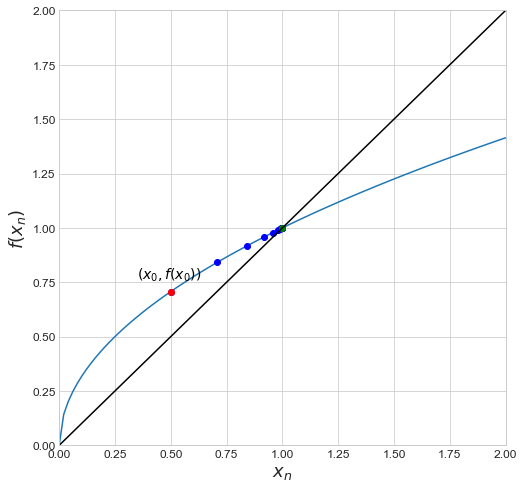

In [4]:
x = np.linspace(0,2,100)
y = f(x)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8), sharex = False)
_ =  ax.plot(x,y,data_fixed_point.xn,f(data_fixed_point.xn),'bo',x0,f(x0),
             'ro',data_fixed_point.xn[n+1],f(data_fixed_point.xn[n+1]),'go',x,x,'k')
_ =  ax.set_xlabel('$x_n$', fontsize=18)
_ =  ax.set_xlim([0,2])
_ =  ax.set_ylabel('$f(x_n)$', fontsize=18)
_ =  ax.set_ylim([0,2])
_ = ax.annotate('$(x_0, f(x_0))$', (x0-0.15,f(x0)+.06), fontsize=14)